In [1]:
#increase the display size to 95% of window width
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:95% !important; }</style>"))

import os
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist
import scipy as sp
import glob

from matplotlib.ticker import FormatStrFormatter

%matplotlib inline
path = os.getcwd().split('/')

machine_path = '/' + path[1] + '/' + path[2]

plt.style.use(machine_path+'/Doutorado/cenarios/mandyoc/scripts/des.mplstyle')

# Cooling of Earth's mantle

According to Turccote and Schubert (2010), the equation for the mantle cooling rate is given by:

$$\frac{\mathrm{d}T}{\mathrm{d}t} = -3\lambda\left(\frac{R T^{2}}{E_a}\large\right) \quad\mathrm{(i),}$$ 

where $T$ is temperature of convecting mantle, $\lambda$ is average decay constant for the mixture of radioactive isotopes in the mantle, $R$ is the gas constant and $E_a$ is the Activation energy per mole.

Let's the equation (i):

$$\frac{\mathrm{d}T_1}{T_1^2} = \frac{-3\lambda R}{E_a}\mathrm{d}t \quad\mathrm{(ii).}$$

Integrating (ii) from $T_0$ to $T_1$ on left side and from $t_0$ to $t$ on right side, we get:

$$\int_{T_0}^{T_1}\frac{\mathrm{d}T}{T^2} = \frac{-3\lambda R}{E_a}\int_{t_0}^{t}\mathrm{d}t \quad\mathrm{(iii)}$$


$$ -\frac{1}{T}\mid_{T_0}^{T_1} = \frac{-3\lambda R}{E_a}t\mid_{t_0}^{t} \quad\mathrm{(iv)}$$

$$ \frac{1}{T_1} - \frac{1}{T_0} = \frac{3\lambda R}{E_a}(t - t_0) \quad\mathrm{(v)}$$

$$ \frac{1}{T_1} = \frac{3\lambda R}{E_a}(t - t_0) + \frac{1}{T_0} \quad\mathrm{(vi)}$$

$$ \frac{1}{T_1} = \frac{T_0 3 \lambda R (t - t_0) + E_a}{T_0 E_a} \quad\mathrm{(vii)}$$

Finally, the mantle temperature $T_1$ at instant $t$ is given by:

$$T_1(t) = \frac{T_{0} E_a}{T_0 3\lambda R (t - t_0) + E_a} \quad\mathrm{(viii)}$$

Assuming:

$t_0 = 0$ [yr] present;

$T_0 = 2250$ [K] is the present mantle temperature;

$E_a = 540 \times 10^3$ [kJ/mol];

$R = 8.31451$ [K/J/mol];

$\lambda = -2.77 \times 10^{-10}$ [$\mathrm{yr}^{-1}$] 

Text(0, 0.5, 'Temperature (K)')

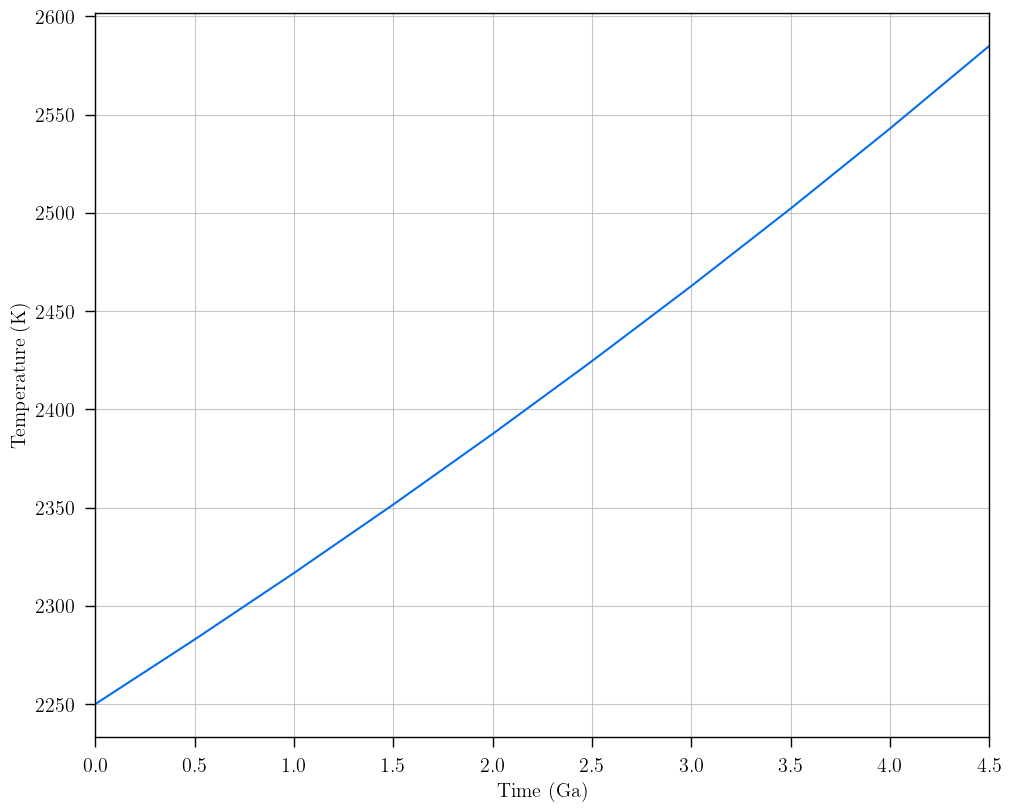

In [2]:
lbda = -2.77e-10 #yr-1
Ea = 540.0e3 #kJ/mol
R = 8.31451
T0 = 2250 #K
t0 = 0.0e9

t = np.arange(0, 5.0e9, 0.5e9)
T = (T0 * Ea) / ((T0 * 3 * lbda * R * (t - t0)) + Ea)

plt.close()
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(10,8), sharex=True, sharey=True)
ax.plot(t/1.0e9, T)
ax.set_xlim([0, 4.5])
ax.grid('-k', alpha=0.7)
ax.set_xlabel('Time (Ga)')
ax.set_ylabel('Temperature (K)')


# Variation of mantle heat production

From Turccote and Schubert (2010), the past mean mantle heat production ($H$) is given by:

$$H = 0.998 C_{0}^{U} H^{U^{238}} \exp \left( \frac{t \ln 2}{\tau_{1/2}^{U^{238}}} \right)\\
+ 0.0071 C_{0}^{U} H^{U^{235}} \exp \left( \frac{t \ln 2}{\tau_{1/2}^{U^{235}}} \right)\\
+ C_{0}^{Th} H^{Th} \exp \left( \frac{t ln 2}{\tau_{1/2}^{Th}} \right)\\
+ 1.19\times10^{-4} C_{0}^{K} H^{K^{40}} \exp \left( \frac{t \ln 2}{\tau_{1/2}^{K^{40}}} \right)$$

Assuming:

$C_{0}^{U} = 3.1 \times 10^{-8}$ kg/kg  ;  $H^{U^{238}} = 9.46 \times 10^{-5}$ W/kg  ;  $\tau_{1/2}^{U^{238}} =  4.47 \times 10^{9}$ yr


$H^{U^{235}} = 5.69 \times 10^{-4}$ W/kg  ;  $\tau_{1/2}^{U^{235}} =  7.04 \times 10^{8}$ yr


$C_{0}^{Th} = 4 C_{0}^{U}$  ;  $H^{Th} = 2.64 \times 10^{-5}$ W/kg  ;  $\tau_{1/2}^{Th} =  1.40 \times 10^{10}$ yr


$C_{0}^{K} = 10^4 C_{0}^{U}$  ;  $H^{K^{40}} = 2.92 \times 10^{-5}$ W/kg  ;  $\tau_{1/2}^{K^{40}} =  1.25 \times 10^{9}$ yr


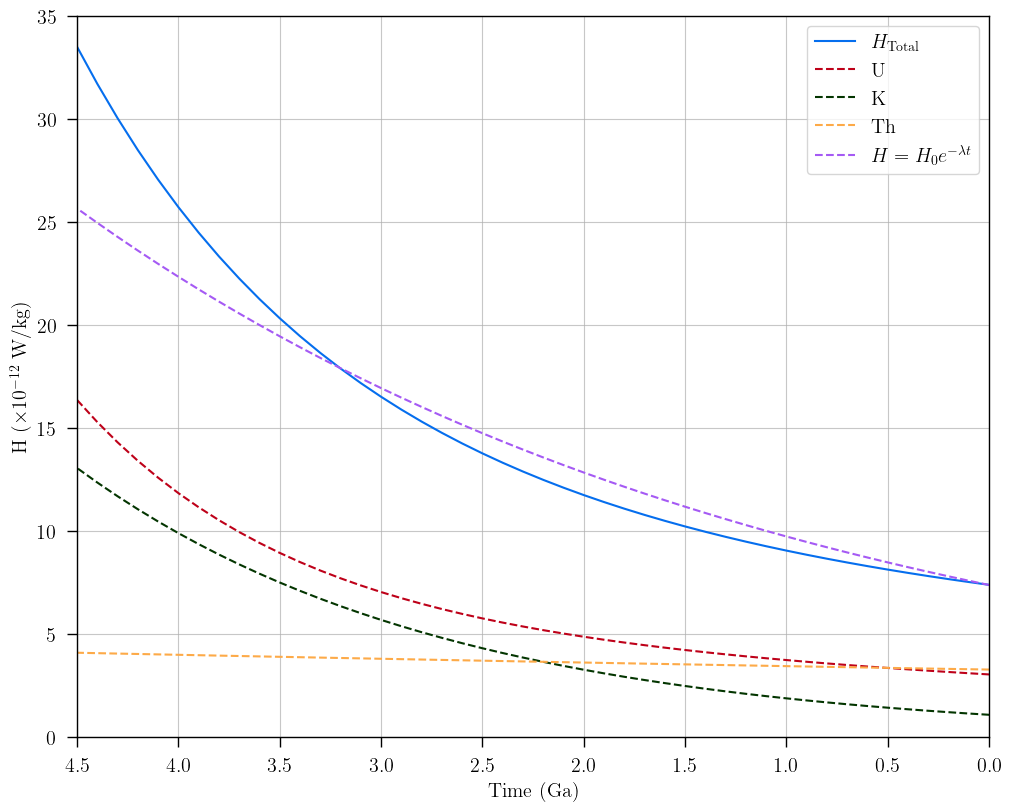

In [14]:
C0U = 3.1e-8 #kg/kg
C0Th = 4*C0U
C0K = 1.0e4*C0U

HU238 = 9.46e-5 #W/kg
tauU238 = 4.47e9 #yr

HU235 = 5.69e-4 #W/kg
tauU235 = 7.04e8 #yr

HTh232 = 2.64e-5 #W/kg
tauTh232 = 1.4e10 #yr

HK40 = 2.92e-5 #W/kg
tauK40 = 1.25e9 #yr

ln2 = np.log(2)

t = np.arange(0, 4.6e9, 0.1e9) #yr

HU = 0.9928  * C0U  * HU238  * np.exp(t*ln2/tauU238) +\
     0.0071  * C0U  * HU235  * np.exp(t*ln2/tauU235)

HK = 1.19e-4 * C0K  * HK40   * np.exp(t*ln2/tauK40)

HTh = 1.0    * C0Th * HTh232 * np.exp(t*ln2/tauTh232)

H = HU + HK + HTh #H/kg

lbda = -2.77e-10 #1/yr
# lbda = -2.5e-10

H0 = 7.38e-12 #W/kg
H_analitic = H0*np.exp(-lbda*(t))

plt.close()
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(10,8), sharex=True, sharey=True)
ax.plot(t/1.0e9, H/1.0e-12, label=r'$H_{\mathrm{Total}}$')
ax.plot(t/1.0e9, HU/1.0e-12, '--', label='U')
ax.plot(t/1.0e9, HK/1.0e-12, '--', label='K')
ax.plot(t/1.0e9, HTh/1.0e-12, '--', label='Th')
ax.plot(t/1.0e9, H_analitic/1.0e-12, '--', label=r'$H = H_0 e^{-\lambda t}$')

ax.legend(loc=1)
ax.grid('-k', alpha=0.7)
ax.set_xlim([4.5, 0])
ax.set_ylim([0, 35])
ax.set_xlabel('Time (Ga)')
ax.set_ylabel(r'H ($\times10^{-12}$ W/kg)')

filename = 'Heat_production_over_time.txt'
data = np.asarray([np.round(t/1.0e9, decimals=2), H/1.0e-12])
np.savetxt('out/'+filename, data.T, delimiter=' ', fmt='%.2f %.5f', header='time[Ga] H[1.0e-12*W/kg]')